## Conceptual Understanding

1. Explain what a random varaible is.Give a real - world business example where mdoeling a random
variable helps in decision-making.

  - A random variable is a numerical value that results from a random experiment. It maps outcomes to numbers.
  - eg: In e-commerce, the number of successful checkouts per 100 users is a random variable. Modeling it helps estimate conversion rates and guide ad spending.


---

2. Define and differentiate between:

• Empirical PMF.

  - Probability distribution calculated from observed data (frequencies).
E.g., 20 out of 100 users clicked a link → P(click) ≈ 0.2.

• Theoretical PMF

  - Probability distribution based on a known mathematical model like Binomial or Poisson, assuming certain parameters.



---

3. . In a business analytics scenario, explain the difference between:
• ˆp (sample proportion)
• P(X = x) (probability mass function value)

  - p̂ (Sample Proportion):
An estimate from sample data (e.g., 0.2 = 20 out of 100 clicked). It estimates the true population probability.

  - P(X = x):
The probability of a specific outcome x occurring (according to the PMF). It may come from theoretical or empirical distributions.

---

4. Explain the purpose of a probability distribution.Why is it useful in data analytics?

  - A probability distribution helps us understand uncertainty and variation in data.

Why it's useful:

- Predicts likelihood of outcomes

- Helps in risk analysis, forecasting, and informed decision-making

- Provides a foundation for statistical modeling

##  Case - Online Order Fulfillment Center:


In [18]:
# Compute the empirical PMF of the number of packing errors per batch.
import numpy as np

# Data
errors = np.array([0, 1, 2, 3, 4, 5])
frequency = np.array([240, 190, 110, 40, 15, 5])
total_batches = 600

# Empirical PMF
empirical_pmf = frequency / total_batches


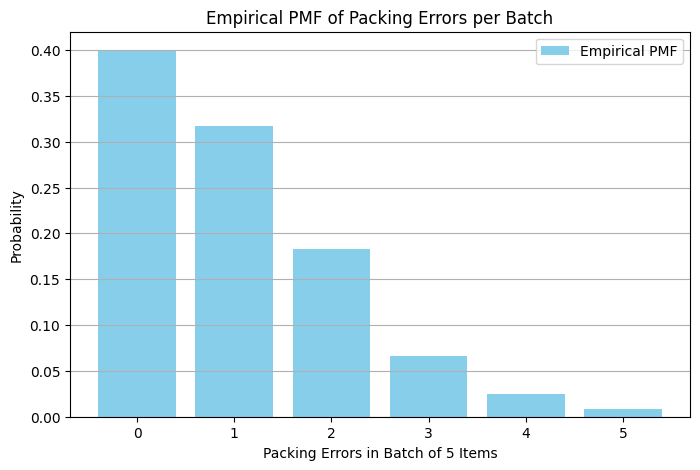

In [19]:
#Plot the empirical PMF using a bar chart (you may use Python, Excel, or draw manually).
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(errors, empirical_pmf, color='skyblue', label='Empirical PMF')
plt.title("Empirical PMF of Packing Errors per Batch")
plt.xlabel("Packing Errors in Batch of 5 Items")
plt.ylabel("Probability")
plt.xticks(errors)
plt.grid(axis='y')
plt.legend()
plt.show()


In [20]:
# Expected value (mean errors)
total_errors = np.sum(errors * frequency)
expected_errors = total_errors / total_batches
print(f"Expected number of errors per batch (Empirical Mean): {expected_errors:.3f}")


Expected number of errors per batch (Empirical Mean): 1.025


In [21]:
#Estimate p̂ and compare with a Binomial model

from scipy.stats import binom

# Total items in all batches = 600 batches × 5 items each
total_items = total_batches * 5

# Estimated probability of packing error (p̂)
p_hat = total_errors / total_items
print(f"Estimated probability of a packing error (p̂): {p_hat:.4f}")


Estimated probability of a packing error (p̂): 0.2050


In [22]:
# Theoretical PMF using Binomial model
theoretical_pmf = binom.pmf(errors, n=5, p=p_hat)


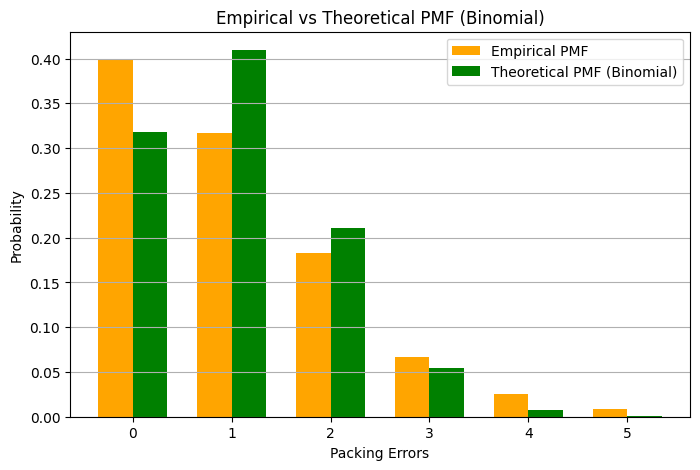

In [23]:
# Plot Empirical vs Theoretical PMF
bar_width = 0.35
plt.figure(figsize=(8, 5))
plt.bar(errors - bar_width/2, empirical_pmf, width=bar_width, label='Empirical PMF', color='orange')
plt.bar(errors + bar_width/2, theoretical_pmf, width=bar_width, label='Theoretical PMF (Binomial)', color='green')
plt.title("Empirical vs Theoretical PMF (Binomial)")
plt.xlabel("Packing Errors")
plt.ylabel("Probability")
plt.xticks(errors)
plt.grid(axis='y')
plt.legend()
plt.show()


##  Design, Collect & Analyze Your Own Data

### Design a Survey or Experiment

1. Choose a topic with measurable, discrete outcomes.
- Topic: Number of times students use AI tools in a week.

- Random Variable (X): The number of times a student uses AI tools for academic purposes in one week.

- Question Asked: "How often do you use AI tools for your studies in a week?"

- Possible Outcomes: {0, 1, 2, 3, 4, 5, 6, 7}

2. Collect Data
- Method: Collected through Google Forms.

- Sample Size: 9 students.

- Variable Type: Discrete, quantitative.


Dataset (Cleaned):

| Respondent | Uses\_per\_week |
| ---------- | --------------- |
| 1          | 5               |
| 2          | 3               |
| 3          | 5               |
| 4          | 5               |
| 5          | 4               |
| 6          | 5               |
| 7          | 5               |
| 8          | 4               |
| 9          | 5               |

3. Analyze Your Data

Frequency Table & Empirical PMF

| Uses\_per\_week | Frequency | Empirical\_PMF |
| --------------- | --------- | -------------- |
| 3               | 1         | 0.111          |
| 4               | 2         | 0.222          |
| 5               | 6         | 0.667          |


4.  Reflect and Report

- What it measured & why it matters:

It measured weekly AI usage for academic purposes, helping understand how integrated AI tools are into student learning habits.

- Challenges:

Small sample size (only 9 students) limits generalization. Most students had very similar usage patterns

- Model fit:

The Poisson model approximates the central tendency but overestimates variability, as real data was highly concentrated around 5.

- What I would do differently:

Increase sample size, add demographic breakdowns (year of study, program), and compare multiple theoretical models for better fit.


In [24]:
# Mount from Google drive
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:

# 1) Load the uploaded CSV

import pandas as pd
import re

csv_path = "/content/drive/MyDrive/dataset/Analyzing Student Habits_ Use of AI Tools in Learning (Responses) - Form Responses 1.csv"

# Load CSV
df = pd.read_csv(csv_path)

print("Raw columns:\n", list(df.columns))
df.head()


Raw columns:
 ['Timestamp', 'Name', 'Field of Study', 'What is your age?', 'Which of the following AI tools have you used for academic purposes?  ', 'How often do you use AI tools for your studies?  ', '  What do you use AI tools for?  ', 'When did you start using AI tools for learning?  ', 'Since using AI tools, how has your study routine changed?  ', 'Do AI tools help you manage your study time better?  ', ' Do you rely more on AI tools than traditional study methods (e.g., books, lectures)?  ', 'Rate how useful AI tools are in helping you learn or understand academic content.  ', 'Which skill have you improved the most by using AI tools?  ']


,Timestamp,Name,Field of Study,What is your age?,Which of the following AI tools have you used for academic purposes?,How often do you use AI tools for your studies?,What do you use AI tools for?,When did you start using AI tools for learning?,"Since using AI tools, how has your study routine changed?",Do AI tools help you manage your study time better?,"Do you rely more on AI tools than traditional study methods (e.g., books, lectures)?",Rate how useful AI tools are in helping you learn or understand academic content.,Which skill have you improved the most by using AI tools?
0,8/7/2025 13:38:29,Tarang Regmi,Computer Science,18-21,"ChatGPT, Google Gemini, Copilot, Perplexity AI...",5,all of the above,Over a year ago,5,5,"Yes, more than traditional methods",5,Research and analysis
1,8/7/2025 13:39:08,Aman Kumar Mahato,Computer Science,18-21,ChatGPT,3,Summarizing content,Over a year ago,4,4,I use both equally,4,Research and analysis
2,8/7/2025 13:39:43,Salina Jyakhwa,Bcs,18-21,Google studio,5,Answering academic questions,Over a year ago,3,3,"Yes, more than traditional methods",4,Coding/programming
3,8/7/2025 13:39:47,Barsha Shrestha,BCS,18-21,"ChatGPT, Google Gemini, Perplexity AI,",5,Answering academic questions,Over a year ago,3,4,I use both equally,4,Research and analysis
4,8/7/2025 13:42:36,Kanin Maharjan,Bcs,18-21,"ChatGPT, Google Gemini",5,All of the above,Over a year ago,5,4,I use both equally,5,All of the above


In [26]:

# 2) Clean column names & find target variable

df.columns = df.columns.str.strip()

# Find the column for "How often do you use AI tools for your studies?"
target_pattern = re.compile(
    r"^how\s*often\s*do\s*you\s*use\s*ai\s*tools\s*for\s*your\s*studies\??",
    re.IGNORECASE
)

usage_col = None
for c in df.columns:
    if target_pattern.search(c.strip()):
        usage_col = c
        break

if usage_col is None:
    raise ValueError("Target column not found!")

print("Detected usage column:", usage_col)


Detected usage column: How often do you use AI tools for your studies?


In [27]:

# 3) Convert to numeric & create cleaned dataset

df[usage_col] = pd.to_numeric(df[usage_col], errors='coerce')
df_clean = df.dropna(subset=[usage_col]).copy()

print(f"Valid responses: {len(df_clean)}")

# Keep just one column for analysis
cleaned_onecol = df_clean[[usage_col]].rename(columns={usage_col: "Uses_per_week"})
cleaned_onecol.head()


Valid responses: 9


,Uses_per_week
0,5
1,3
2,5
3,5
4,5


In [28]:

# 4) Frequency table & empirical PMF

freq_table = cleaned_onecol["Uses_per_week"].value_counts().sort_index()
pmf_empirical = freq_table / len(cleaned_onecol)

freq_df = pd.DataFrame({
    "Uses_per_week": freq_table.index,
    "Frequency": freq_table.values,
    "Empirical_PMF": pmf_empirical.values
}).reset_index(drop=True)

print(freq_df)


   Uses_per_week  Frequency  Empirical_PMF
0              3          1       0.111111
1              4          1       0.111111
2              5          7       0.777778


In [29]:

# 5) Summary statistics

mean_val = cleaned_onecol["Uses_per_week"].mean()
var_val  = cleaned_onecol["Uses_per_week"].var()  # sample variance

print(f"Sample size (n): {len(cleaned_onecol)}")
print(f"Sample Mean: {mean_val:.4f}")
print(f"Sample Variance: {var_val:.4f}")


Sample size (n): 9
Sample Mean: 4.6667
Sample Variance: 0.5000


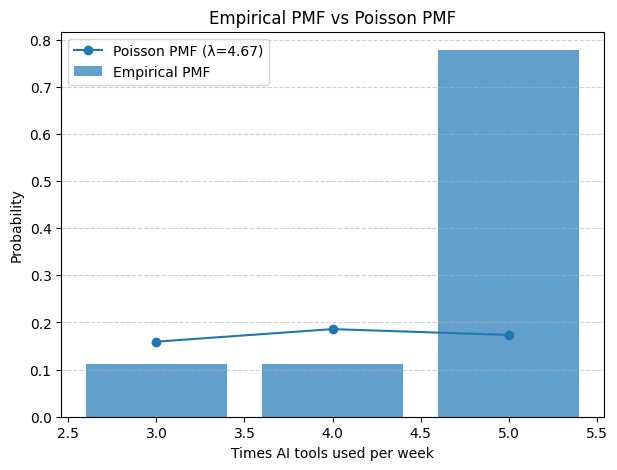

In [30]:

# 6) Plot Empirical PMF vs Poisson

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

x_vals = np.arange(int(cleaned_onecol["Uses_per_week"].min()),
                   int(cleaned_onecol["Uses_per_week"].max()) + 1)

pmf_poisson = poisson.pmf(x_vals, mu=mean_val)

plt.figure(figsize=(7,5))
plt.bar(freq_df["Uses_per_week"], freq_df["Empirical_PMF"], label="Empirical PMF", alpha=0.7)
plt.plot(x_vals, pmf_poisson, 'o-', label=f"Poisson PMF (λ={mean_val:.2f})")
plt.xlabel("Times AI tools used per week")
plt.ylabel("Probability")
plt.title("Empirical PMF vs Poisson PMF")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [31]:

# 7) Reflection & business insight

reflection = f"""
Reflection and Business Insight
-------------------------------
Variable measured:
- Number of times students use AI tools weekly for academic purposes (discrete).

Why it matters:
- Shows AI adoption and integration into student study habits.

Challenges:
- Small sample size ({len(cleaned_onecol)}) limits generalization.
- Data required cleaning due to extra spaces in column names from Google Forms.

Model fit:
- Poisson(λ={mean_val:.2f}) captures the central tendency but overestimates spread
  compared to the more concentrated real data.

If repeating:
- Increase sample size, collect demographic info, and test multiple models (Poisson vs Binomial)
  to compare visual fit.
"""
print(reflection)



Reflection and Business Insight
-------------------------------
Variable measured:
- Number of times students use AI tools weekly for academic purposes (discrete).

Why it matters:
- Shows AI adoption and integration into student study habits.

Challenges:
- Small sample size (9) limits generalization.
- Data required cleaning due to extra spaces in column names from Google Forms.

Model fit:
- Poisson(λ=4.67) captures the central tendency but overestimates spread
  compared to the more concentrated real data.

If repeating:
- Increase sample size, collect demographic info, and test multiple models (Poisson vs Binomial)
  to compare visual fit.

